# Mixture Model Results

#### First, some python imports

In [167]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

mainDir = '/Users/rachelanderson/Desktop/Research/Anderson_TermPaper_515'
gammaDir = mainDir + '/Data/Gamma/'
sgDir = mainDir + '/Data/simpleGibbsOutput/'
figDir = mainDir + '/Figures/mm/'

ext = 'nM2_L4'
L=2

I test the following parameter combinations. In this table, $p_{ML} = 0.9 \implies (p_{M1},\dots,p_{ML}) = (0.9, 0.9, \dots, 0.9)$  so that $m-$ and $u-$ probabilities do not vary by category. 

In [132]:
pd.read_csv(mainDir + '/Code/SLURM/jobs.csv')

,L,n1,n2,pM,pML,pUL
0,2,10,10,0.2,0.9,0.2
1,3,10,10,0.2,0.9,0.2
2,4,10,10,0.2,0.9,0.2
3,5,10,10,0.2,0.9,0.2
4,2,20,20,0.5,0.9,0.2
5,3,20,20,0.5,0.9,0.2
6,4,20,20,0.5,0.9,0.2
7,5,20,20,0.5,0.9,0.2
8,2,10,10,0.9,0.9,0.2
9,3,10,10,0.9,0.9,0.2


### Let's look at one of the parameter combinations.

Here, we are looking at $(L, n_1, n_2, p_M, p_{ML}, p_{UL}) = (4, 10, 10, 0.5, 0.9, 0.2)$. The data looks like this:

In [133]:
sampleGamma = pd.read_csv(gammaDir + 'Gamma_' + ext +'.csv') 
sampleGamma = sampleGamma.drop(['Unnamed: 0'], axis = 1)
sampleGamma.head()

,i,j,Z,match,gamma
0,0,0,16,False,[0 0 0 0]
1,0,1,16,False,[0 0 0 0]
2,0,2,16,False,[1 1 0 0]
3,0,3,16,False,[0 0 0 0]
4,0,4,16,False,[0 0 0 0]


The matches are below (there are only $10$ out of $20^2$ candidate pairs):

In [134]:
sampleGamma[sampleGamma['match']==True]

,i,j,Z,match,gamma
16,0,16,16,True,[1 1 1 1]
21,1,1,1,True,[1 1 1 1]
46,2,6,6,True,[1 1 1 1]
77,3,17,17,True,[1 1 1 1]
119,5,19,19,True,[1 1 1 1]
138,6,18,18,True,[0 1 1 1]
151,7,11,11,True,[1 1 1 1]
169,8,9,9,True,[1 1 1 1]
280,14,0,0,True,[1 1 1 1]
363,18,3,3,True,[1 0 0 1]


In [169]:
df = pd.read_csv(sgDir + 'sg_trace_' + ext + '.csv')
df=df.drop(['Unnamed: 0'], axis = 1)
df_burnt = df[5000:99999]
df.head()

,pM,pML_1,pML_2,pML_3,pML_4,pUL_1,pUL_2,pUL_3,pUL_4
0,0.504839,0.261834,0.212239,0.278818,0.292766,0.231550,0.226273,0.400330,0.246714
1,0.444539,0.221936,0.164232,0.279440,0.264404,0.160966,0.401723,0.338937,0.212423
2,0.341471,0.475585,0.279352,0.172677,0.234666,0.158335,0.210296,0.244207,0.284712
3,0.047564,0.373270,0.718362,0.638736,0.383016,0.196313,0.168427,0.276946,0.217924
4,0.015413,0.135131,0.622220,0.585150,0.296357,0.157564,0.295163,0.235572,0.206055


### Did the chain converge?
#### $m-$ probabilities

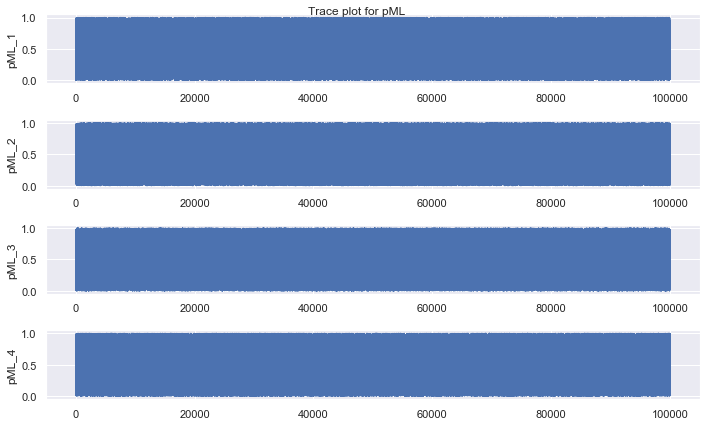

In [140]:
plt.figure(1, figsize=(10, 6))

plt.subplot(411)
plt.plot(df_burnt[['pML_1']])
plt.ylabel('pML_1')

plt.subplot(412)
plt.plot(df_burnt[['pML_2']])
plt.ylabel('pML_2')

plt.subplot(413)
plt.plot(df_burnt[['pML_3']])
plt.ylabel('pML_3')

plt.subplot(414)
plt.plot(df_burnt[['pML_4']])
plt.ylabel('pML_4')

# plt.subplot(515)
# plt.plot(df_burnt[['pML_5']])
# plt.ylabel('pML_4')

plt.suptitle('Trace plot for pML')
plt.tight_layout()
plt.savefig(figDir + 'traceML_' + ext + '.png')
plt.show()

#### $u$ probabilities

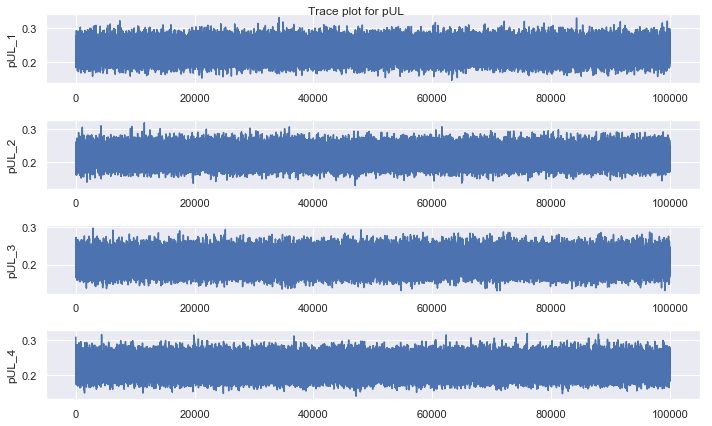

In [141]:
plt.figure(1, figsize=(10, 6))

plt.subplot(411)
plt.plot(df_burnt[['pUL_1']])
plt.ylabel('pUL_1')

plt.subplot(412)
plt.plot(df_burnt[['pUL_2']])
plt.ylabel('pUL_2')

plt.subplot(413)
plt.plot(df_burnt[['pUL_3']])
plt.ylabel('pUL_3')

plt.subplot(414)
plt.plot(df_burnt[['pUL_4']])
plt.ylabel('pUL_4')

# plt.subplot(515)
# plt.plot(df_burnt[['pUL_5']])
# plt.ylabel('pUL_5')

plt.suptitle('Trace plot for pUL')
plt.tight_layout()
plt.savefig(figDir + 'traceUL_' + ext + '.png')
plt.show()

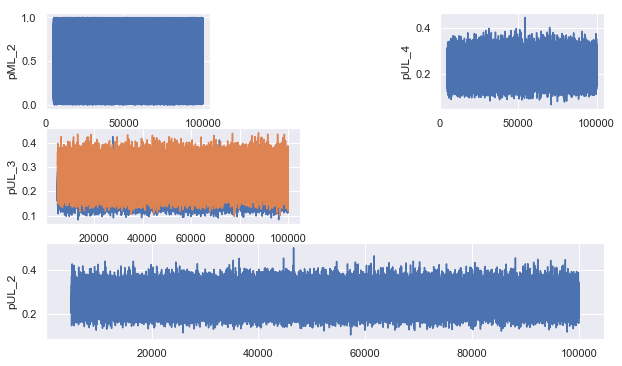

In [170]:
plt.figure(1, figsize=(10, 6))

plt.subplot(311)
plt.plot(df[['pM']])
plt.title('Trace of pM (without burn-in)')
plt.xlabel('Iteration')

plt.subplot(321)
plt.plot(df_burnt[['pML_1']])
plt.ylabel('pML_1')

plt.subplot(331)
plt.plot(df_burnt[['pML_2']])
plt.ylabel('pML_2')

plt.subplot(312)
plt.plot(df_burnt[['pML_3']])
plt.ylabel('pML_3')

plt.subplot(322)
plt.plot(df_burnt[['pML_4']])
plt.ylabel('pML_4')

plt.subplot(323)
plt.plot(df_burnt[['pUL_1']])
plt.ylabel('pUL_1')

plt.subplot(313)
plt.plot(df_burnt[['pUL_2']])
plt.ylabel('pUL_2')

plt.subplot(323)
plt.plot(df_burnt[['pUL_3']])
plt.ylabel('pUL_3')

plt.subplot(333)
plt.plot(df_burnt[['pUL_4']])
plt.ylabel('pUL_4')



#### Trace plot for $p_M$ (without burn-in)

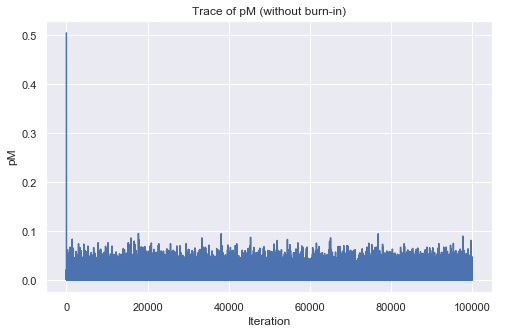

In [171]:
sns.set(rc={'figure.figsize':(8,5)})
plt.plot(df[['pM']])
plt.title('Trace of pM (without burn-in)')
plt.xlabel('Iteration')
plt.ylabel('pM')
plt.savefig(figDir + 'traceM_' + ext + '.png')

In [175]:
df_burnt.describe().round(4)

,pM,pML_1,pML_2,pML_3,pML_4,pUL_1,pUL_2,pUL_3,pUL_4
count,94999.0000,94999.0000,94999.0000,94999.0000,94999.0000,94999.0000,94999.0000,94999.0000,94999.0000
mean,0.0098,0.5009,0.5005,0.5003,0.5003,0.2156,0.2647,0.2548,0.2156
std,0.0096,0.2884,0.2886,0.2895,0.2889,0.0405,0.0435,0.0432,0.0404
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0830,0.1065,0.0969,0.0669
25%,0.0029,0.2519,0.2511,0.2500,0.2501,0.1871,0.2344,0.2246,0.1874
50%,0.0069,0.5007,0.5008,0.5005,0.5009,0.2136,0.2632,0.2530,0.2139
75%,0.0136,0.7502,0.7507,0.7501,0.7508,0.2419,0.2933,0.2832,0.2420
max,0.0951,1.0000,1.0000,1.0000,1.0000,0.4247,0.5012,0.4408,0.4457


### Comments on convergence

The distribution for $p_M$ appears to be stuck. 

### Histogram of parameters $p_M, p_{M\ell}, p_{U\ell}$

In [130]:
plt.rcParams['figure.figsize'] = (20, 20)
hist_plot = df_burnt.hist(bins=30,layout=(2,2))
plt.savefig(figDir + 'allParam_' + ext + '.png')

ValueError: Layout of 2x2 must be larger than required size 5

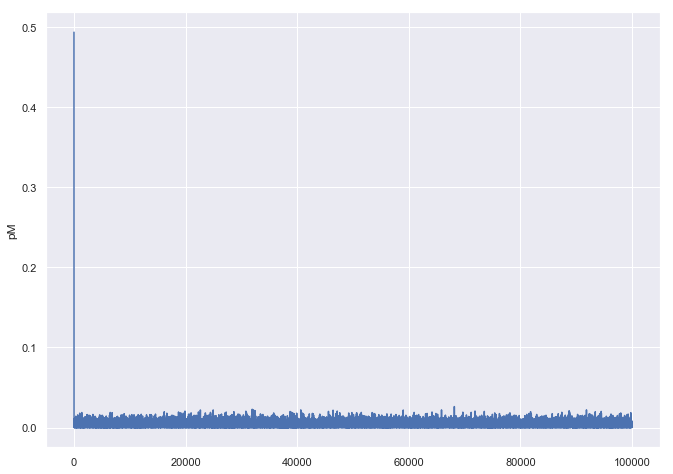

In [159]:
 sns.lineplot(x= df.index, y=df[i], data = df)

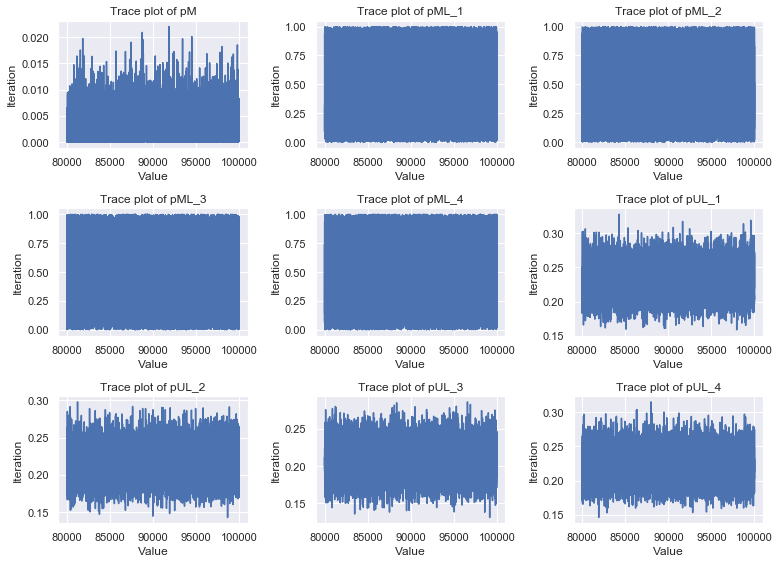

In [166]:
sns.set(rc={'figure.figsize':(11,8)})
from scipy.stats import beta
data_beta = beta.rvs(1,1, size=100000)
L=5

strings = ['pM', 'pML_1', 'pML_2', 'pML_3', 'pML_4', 'pUL_1', 'pUL_2']
for (idx, i) in enumerate(df_burnt.columns):
    
    # Set up the plot
    ax = plt.subplot(3, 3, idx + 1)
    
#     string = 'pML_' + str(i+1)
    # Draw the plot
    sns.lineplot(x= df_burnt.index, y=df_burnt[i], data = df_burnt)
#     sns.distplot(data_beta, color='red', hist=False, label='Prior')
    
    # Title and labels
    ax.set_title('Trace plot of %s' % i)
    ax.set_xlabel('Value')
    ax.set_ylabel('Iteration')
    
plt.tight_layout()
plt.savefig(figDir + 'allTrace_thinned_' + ext + '.png')
plt.show()

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


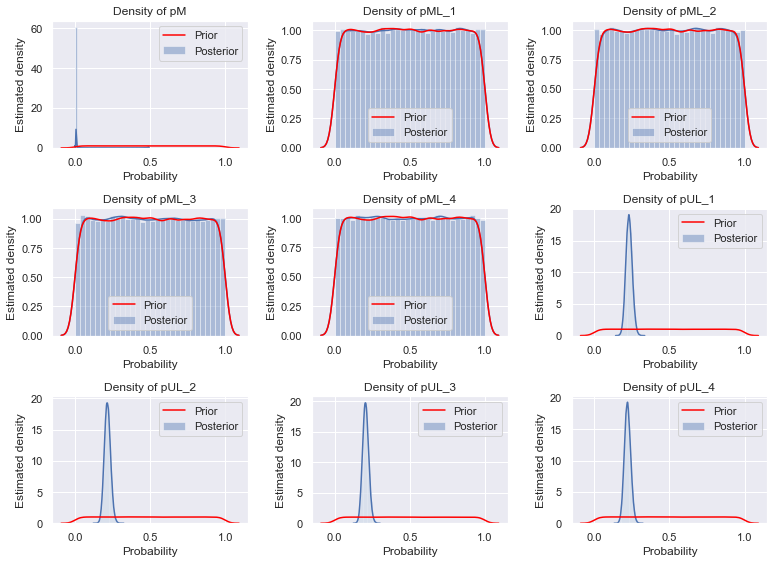

In [149]:
sns.set(rc={'figure.figsize':(11,8)})
from scipy.stats import beta
data_beta = beta.rvs(1,1, size=100000)
L = 4

for i in range(L):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    string = 'pML_' + str(i+1)
    # Draw the plot
    sns.distplot(eval('df_burnt[[\'' + string + '\']]'), bins=30, label = 'Posterior')
    sns.distplot(data_beta, color='red', hist=False, label='Prior')
    
    # Title and labels
    ax.set_title('Density of %s' % string)
    ax.set_xlabel('Probability')
    ax.set_ylabel('Estimated density')

plt.tight_layout()
plt.savefig(figDir + 'pML_' + ext + '.png')
plt.show()

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


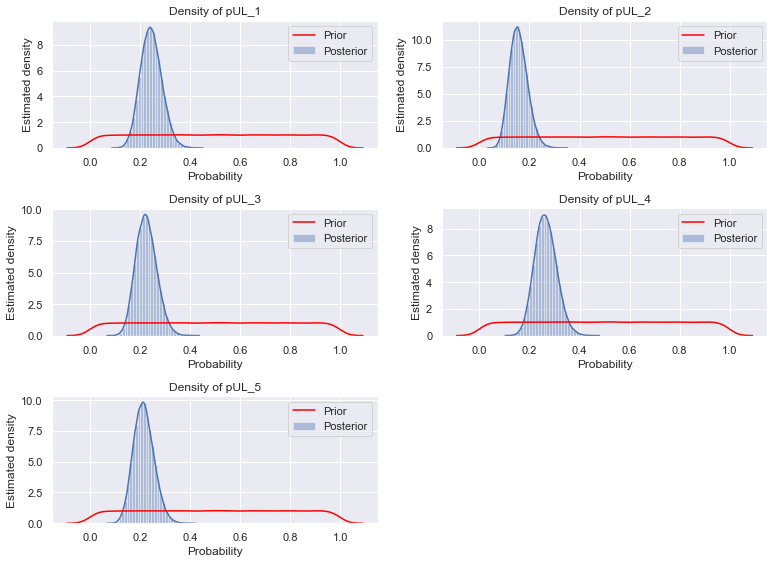

In [93]:
for i in range(L):
    
    # Set up the plot
    ax = plt.subplot(3, 2, i + 1)
    
    string = 'pUL_' + str(i+1)
    # Draw the plot
    sns.distplot(eval('df_burnt[[\'' + string + '\']]'), bins=30, label='Posterior')
    sns.distplot(data_beta, color='red', hist=False, label='Prior')
    
    # Title and labels
    ax.set_title('Density of %s' % string)
    ax.set_xlabel('Probability')
    ax.set_ylabel('Estimated density')
    
plt.tight_layout()
plt.savefig(figDir + 'pUL_' + ext + '.png')
# plt.show()

In [86]:
# sns.distplot(df_burnt[['pM']], bins=30)
# sns.distplot(data_beta, color='red', hist=False, label='Prior')

In [87]:
i = open('/Users/rachelanderson/Desktop/Research/Anderson_TermPaper_515/Data/simple_gibbs_' + ext + '.txt')
iSum = i.readline().replace('.', ',')
iSum = iSum.replace('\n',']')
iSum = eval(iSum)
print(iSum)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rachelanderson/Desktop/Research/Anderson_TermPaper_515/Data/simple_gibbs_nM2_L5.txt'

#### This method is really bad.  From here we could check correlation among draws or other convergence criteria but it's looking pretty bad.

## Try another file?

In [ ]:
# sns.scatterplot(x='pML_1',y='pUL_1', data=df_burnt)
# sns.scatterplot(x='pM',y='pML_1', data=df_burnt)
# corrmat = trace_burnt.corr()
# sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()
# t = trace_burnt.describe()

## Comments

#### Sampling $I$

This method does not perform well, even when I impose strong priors and set initial parameter values equal to the truth.  

First, the posterior for $p_M$ is heavily skewed toward 1 when I sample $I$ using the formula in Step 1.  This corresponds with high posterior probabilities of $I(a,b)$, which may imply large false positive matching rates if threshold is set too low. 

This issue reflects the fact that updates to $(p_M, p_{M\ell}, p_{U\ell})$ depend on assignments of $I(a,b)$. The $sample_I$ function is too quick to assign matches.  This may result from the fact that I use two clusters, and that once $p_{U\ell}$ probabilities get set low, the chain cannot recover.  I test this issue by adding 1 to the denominator of the Bernoulli parameter in Step 1:

$$p \equiv Pr(\ I(a,b)^{(k+1)}=1\ |\ \gamma(a,b)) = Pr(\ M\  |\  \gamma(a,b)) = \frac{p_M^{(k)}Pr(\ \gamma(a,b)\ |\ M)}{Pr(\gamma(a,b)) + 1} $$ 

This change prevents $p_M$ from converging to 1 <span style="color:blue">(but I need to write more tests) </span>

#### Other bugs

My results are extremely sensitive to a choice of prior! Choosing the prior will be important to explore. 

Could I sample from the joint distribution of $(p_M, p_{M\ell}, p_{U\ell})\ | I$?  Could I model as Dirichlet?

Ultimately it is not worth the time and energy trying to fix this broken method so now I focus on the bipartite matching, which will fix many of these issues.